In [3]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs=np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
# Create a list for holding the cities.
cities = []
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)
     



severo-kurilsk ru
atuona pf
rikitea pf
linxia cn
hithadhoo mv
kapaa us
rikitea pf
albany au
uhlove ua
barrow us
arraial do cabo br
coos bay us
coquimbo cl
amderma ru
albany au
inta ru
new norfolk au
jiazi cn
mataura pf
alice springs au
bandrele yt
bluff nz
muzhi ru
jamestown sh
puerto ayora ec
ushuaia ar
yaan cn
paradwip in
bembereke bj
yellowknife ca
mataura pf
bambous virieux mu
saurimo ao
lagoa pt
brandon us
lebu cl
puerto ayora ec
cape town za
bluff nz
awjilah ly
sampit id
camacha pt
avarua ck
vestmanna fo
parana ar
kavieng pg
isangel vu
victoria sc
vaini to
upernavik gl
severo-kurilsk ru
taolanaro mg
codrington ag
severo-kurilsk ru
miram shah pk
ribeira grande pt
ushuaia ar
okandja ga
victoria sc
rikitea pf
burley us
mankato us
ushuaia ar
coihaique cl
matagami ca
saint-augustin ca
touros br
lebu cl
saskylakh ru
bredasdorp za
tsihombe mg
campo verde br
castro cl
attawapiskat ca
soligalich ru
tsihombe mg
vila vu
nanortalik gl
albany au
inyonga tz
airai pw
brigantine us
port elizabet

nikolskoye ru
ponta do sol cv
albany au
port hardy ca
mataura pf
tournon-sur-rhone fr
mar del plata ar
umm lajj sa
lebu cl
georgetown sh
chuy uy
fortuna us
ust-maya ru
longyearbyen sj
kaitangata nz
gumdag tm
geraldton ca
qaanaaq gl
lagoa pt
saint george bm
new norfolk au
new norfolk au
geresk af
tasiilaq gl
bredasdorp za
rawson ar
butaritari ki
palabuhanratu id
halalo wf
banjar id
kamenskoye ru
belushya guba ru
vestmannaeyjar is
santa cruz de tenerife es
carnarvon au
ribeira grande pt
lethem gy
bilibino ru
grand river south east mu
kapaa us
punta arenas cl
yellowknife ca
busselton au
khonuu ru
narsaq gl
trairi br
toftir fo
parrita cr
bluff nz
ushuaia ar
upernavik gl
tasiilaq gl
ushuaia ar
mwene-ditu cd
port lincoln au
cabo san lucas mx
ushuaia ar
jamestown sh
sulangan ph
punta arenas cl
mochudi bw
ushuaia ar
maputo mz
babynino ru
aracati br
deputatskiy ru
kaitangata nz
east london za
geraldton au
high prairie ca
sao filipe cv
deputatskiy ru
wanning cn
saint-philippe re
punta arenas cl


yeppoon au
punta arenas cl
bluff nz
punta arenas cl
balimo pg
upernavik gl
sao joao da barra br
souillac mu
sola vu
hope ca
mayfield us
atuona pf
christchurch nz
sentyabrskiy ru
temaraia ki
ilebo cd
bartica gy
jamestown sh
redondo pt
cape town za
karratha au
zverinogolovskoye ru
anadyr ru
santa isabel do rio negro br
juneau us
vaini to
mataura pf
margate za
rikitea pf


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import pandas as pd
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        continue

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | linxia
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | uhlove
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | coos bay
Processing Record 12 of Set 1 | coquimbo
Processing Record 13 of Set 1 | amderma
City not found. Skipping...
Processing Record 14 of Set 1 | inta
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | jiazi
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | alice springs
Processing Record 19 of Set 1 | bandrele
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | muzhi
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | puerto ayora
Processing Record 24 of Set 1 | ushuaia


Processing Record 39 of Set 4 | kahului
Processing Record 40 of Set 4 | baruun-urt
Processing Record 41 of Set 4 | tuktoyaktuk
Processing Record 42 of Set 4 | ust-tsilma
Processing Record 43 of Set 4 | east london
Processing Record 44 of Set 4 | carnarvon
Processing Record 45 of Set 4 | humberto de campos
Processing Record 46 of Set 4 | inhambane
Processing Record 47 of Set 4 | sisimiut
Processing Record 48 of Set 4 | bonavista
Processing Record 49 of Set 4 | fort nelson
Processing Record 50 of Set 4 | mangalam
Processing Record 1 of Set 5 | santarem
Processing Record 2 of Set 5 | mineral wells
Processing Record 3 of Set 5 | waipawa
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | teyateyaneng
Processing Record 6 of Set 5 | tautira
Processing Record 7 of Set 5 | arak
Processing Record 8 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 5 | manta
Processing Record 10 of Set 5 | hovd
Processing Record 11 of Set 5 | boda
Processing Record 12 o

Processing Record 27 of Set 8 | toftir
City not found. Skipping...
Processing Record 28 of Set 8 | parrita
Processing Record 29 of Set 8 | mwene-ditu
Processing Record 30 of Set 8 | port lincoln
Processing Record 31 of Set 8 | sulangan
Processing Record 32 of Set 8 | mochudi
Processing Record 33 of Set 8 | maputo
Processing Record 34 of Set 8 | babynino
Processing Record 35 of Set 8 | aracati
Processing Record 36 of Set 8 | high prairie
Processing Record 37 of Set 8 | wanning
Processing Record 38 of Set 8 | morgan city
Processing Record 39 of Set 8 | ornskoldsvik
Processing Record 40 of Set 8 | sehithwa
Processing Record 41 of Set 8 | riberalta
Processing Record 42 of Set 8 | jinka
Processing Record 43 of Set 8 | vao
Processing Record 44 of Set 8 | gangapur
Processing Record 45 of Set 8 | menongue
Processing Record 46 of Set 8 | gumushane
City not found. Skipping...
Processing Record 47 of Set 8 | kolpashevo
Processing Record 48 of Set 8 | toul
Processing Record 49 of Set 8 | port augu

City not found. Skipping...
Processing Record 15 of Set 12 | lasa
Processing Record 16 of Set 12 | suntar
Processing Record 17 of Set 12 | puerto leguizamo
Processing Record 18 of Set 12 | kavaratti
Processing Record 19 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 20 of Set 12 | mehran
Processing Record 21 of Set 12 | niono
Processing Record 22 of Set 12 | oster
Processing Record 23 of Set 12 | kankavli
City not found. Skipping...
Processing Record 24 of Set 12 | sinkat
City not found. Skipping...
Processing Record 25 of Set 12 | bhag
Processing Record 26 of Set 12 | gao
Processing Record 27 of Set 12 | puerto penasco
Processing Record 28 of Set 12 | luanda
Processing Record 29 of Set 12 | palmer
Processing Record 30 of Set 12 | bridlington
Processing Record 31 of Set 12 | lhokseumawe
Processing Record 32 of Set 12 | takoradi
Processing Record 33 of Set 12 | amga
Processing Record 34 of Set 12 | flinders
Processing Record 35 of Set 12 | telimele
Processing Reco

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kurilsk,50.6789,156.1250,24.94,81,68,4.43,RU,2022-02-02 06:45:33
1,Atuona,-9.8000,-139.0333,78.73,76,11,20.00,PF,2022-02-02 06:45:34
2,Rikitea,-23.1203,-134.9692,78.53,67,100,3.76,PF,2022-02-02 06:45:34
3,Linxia,35.6003,103.2064,26.91,62,70,2.53,CN,2022-02-02 06:45:35
4,Hithadhoo,-0.6000,73.0833,82.87,70,6,9.62,MV,2022-02-02 06:45:36
5,Kapaa,22.0752,-159.3190,73.72,79,75,10.36,US,2022-02-02 06:45:36
6,Albany,42.6001,-73.9662,30.78,75,100,5.59,US,2022-02-02 06:44:02
7,Uhlove,44.8215,33.6045,47.57,86,100,12.17,UA,2022-02-02 06:45:37
8,Barrow,71.2906,-156.7887,-18.38,76,0,8.05,US,2022-02-02 06:44:05
9,Arraial Do Cabo,-22.9661,-42.0278,74.82,89,100,7.25,BR,2022-02-02 06:45:37


In [12]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kurilsk,RU,2022-02-02 06:45:33,50.6789,156.1250,24.94,81,68,4.43
1,Atuona,PF,2022-02-02 06:45:34,-9.8000,-139.0333,78.73,76,11,20.00
2,Rikitea,PF,2022-02-02 06:45:34,-23.1203,-134.9692,78.53,67,100,3.76
3,Linxia,CN,2022-02-02 06:45:35,35.6003,103.2064,26.91,62,70,2.53
4,Hithadhoo,MV,2022-02-02 06:45:36,-0.6000,73.0833,82.87,70,6,9.62
...,...,...,...,...,...,...,...,...,...
561,Redondo,PT,2022-02-02 07:02:05,38.6487,-7.5471,32.38,81,0,3.91
562,Karratha,AU,2022-02-02 07:02:05,-20.7377,116.8463,88.45,61,21,11.03
563,Zverinogolovskoye,RU,2022-02-02 07:02:06,54.4586,64.8542,20.84,85,100,15.39
564,Santa Isabel Do Rio Negro,BR,2022-02-02 07:02:06,-0.4139,-65.0192,73.04,98,96,2.46


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1643785381.9289432

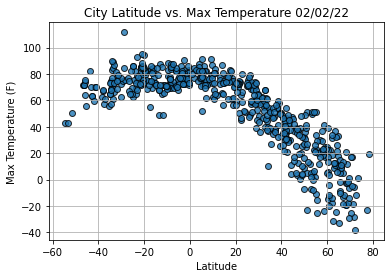

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


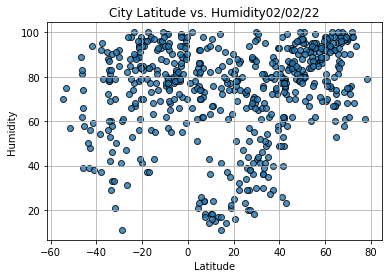

In [17]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

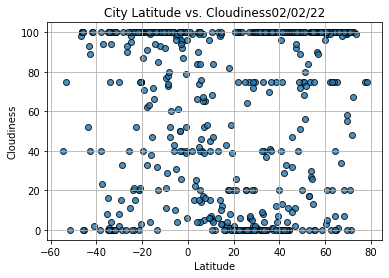

In [19]:
# Build the scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
          cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness"+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

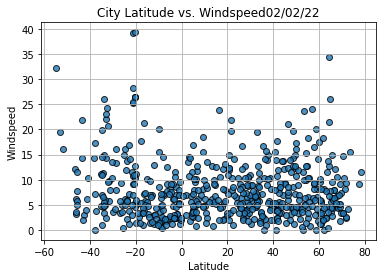

In [20]:
# Build the scatter plot for latitude vs. Windspeed
plt.scatter(lats,
          wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Windspeed"+ time.strftime("%x"))
plt.ylabel("Windspeed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()